In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Maryl\OneDrive\Allstate AI\claims_data.csv")

In [3]:
df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [4]:
df.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

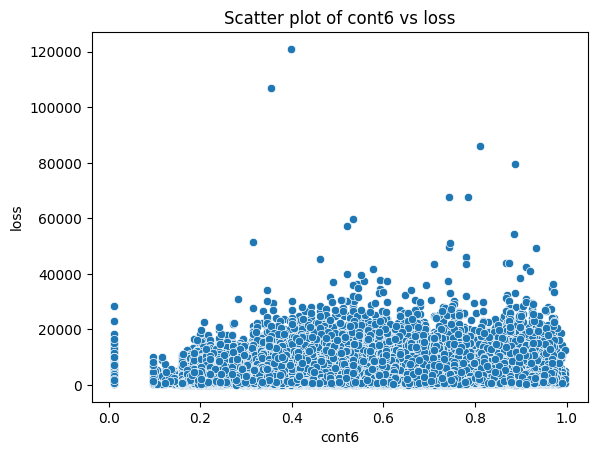

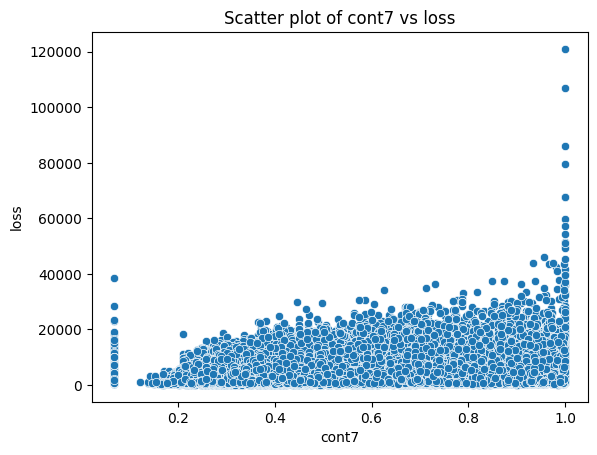

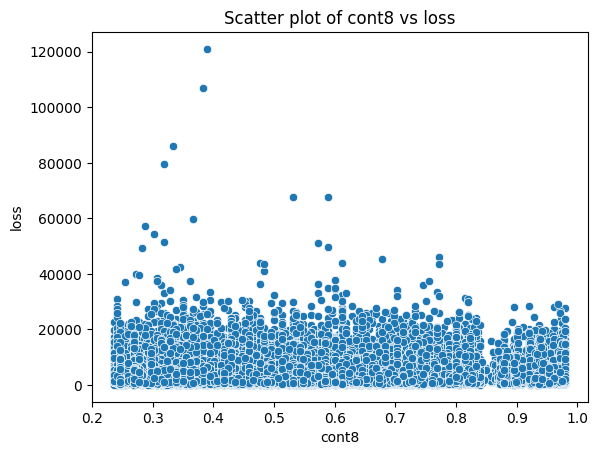

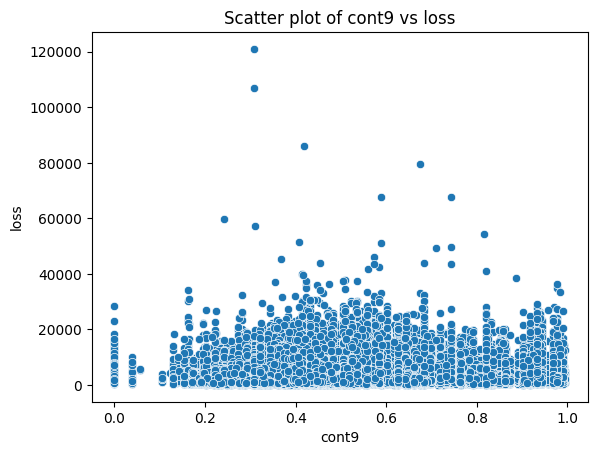

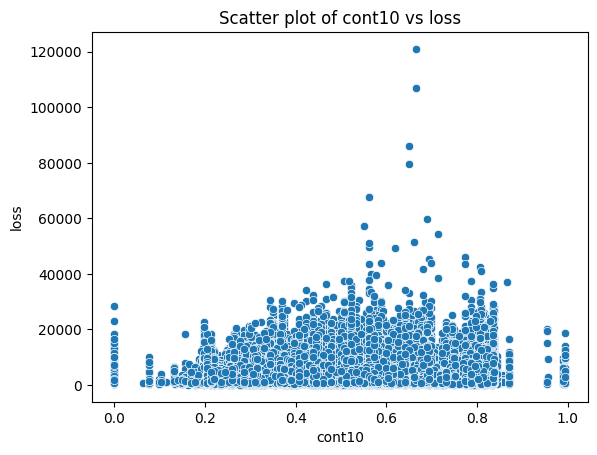

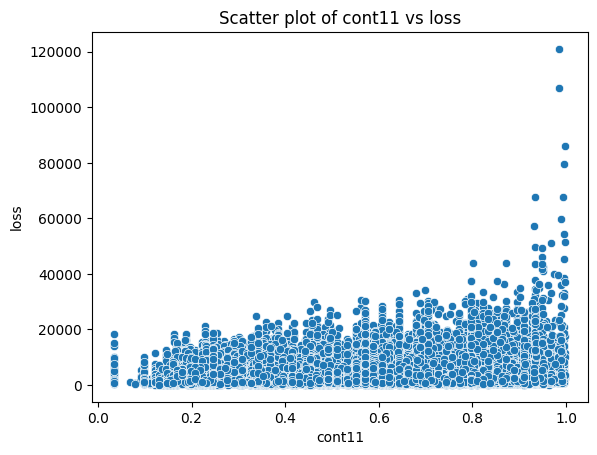

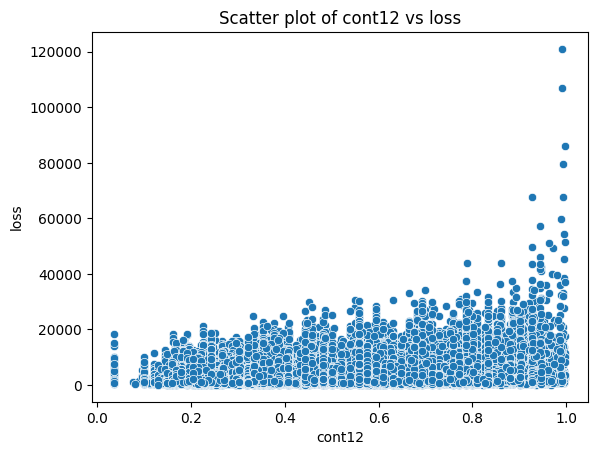

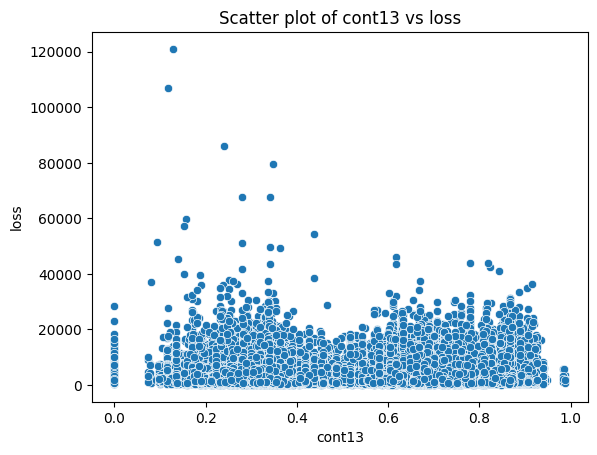

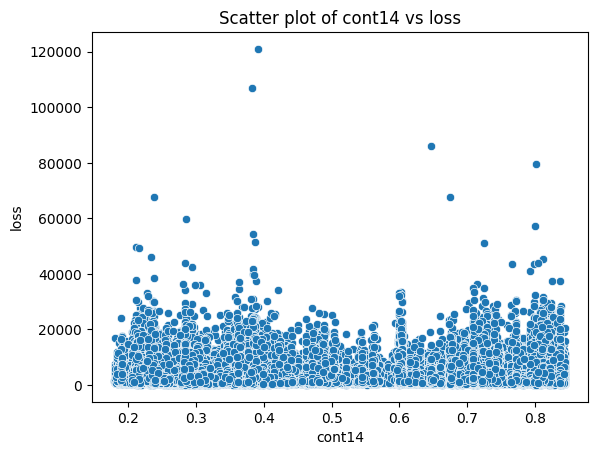

In [6]:
label_column = "loss"
cont_feats =  ['cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14']
for feature in cont_feats:
    sns.scatterplot(x=feature, y=label_column, data=df)
    plt.title(f'Scatter plot of {feature} vs {label_column}')
    plt.xlabel(feature)
    plt.ylabel(label_column)
    plt.show()

In [7]:
nan_counts = df.isnull().sum()
nan_counts

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

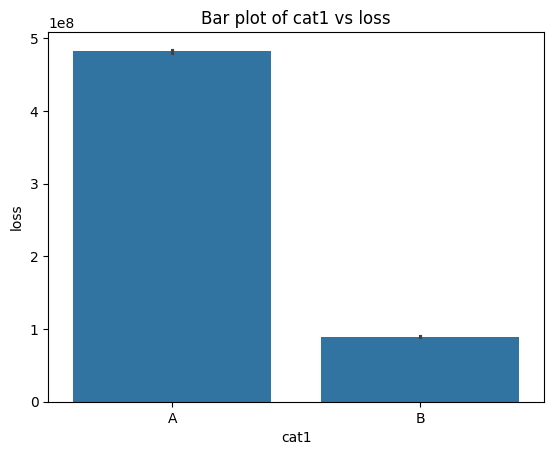

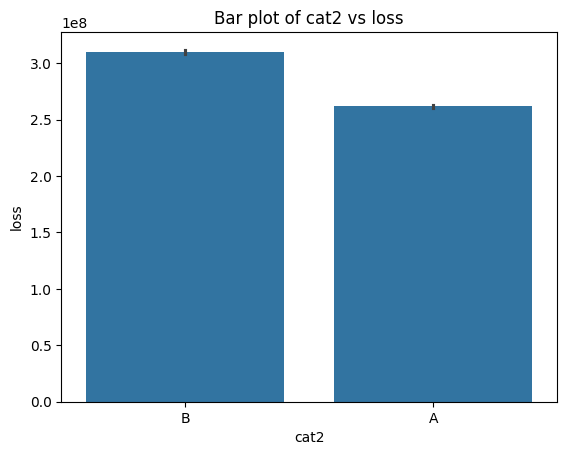

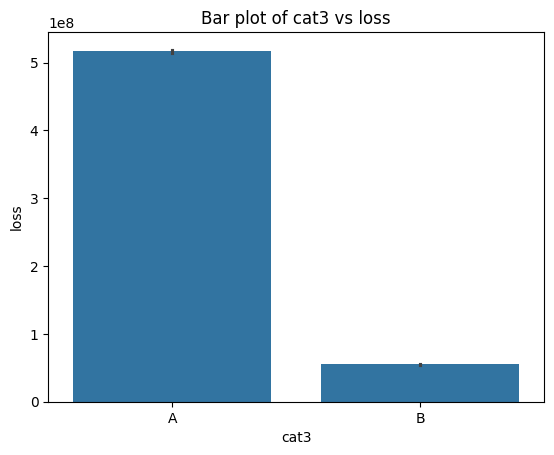

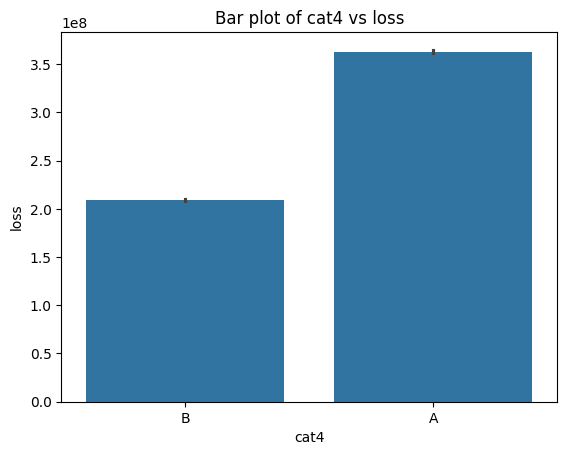

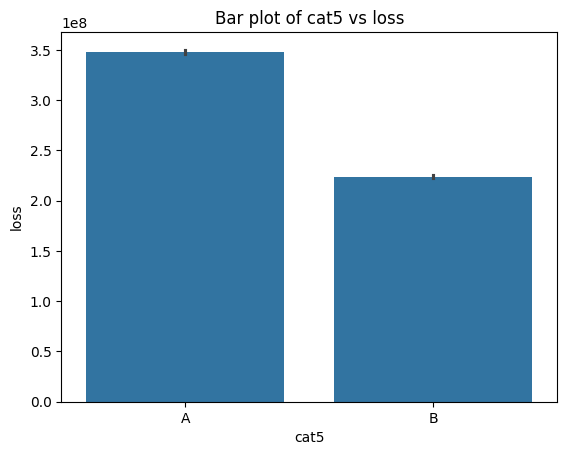

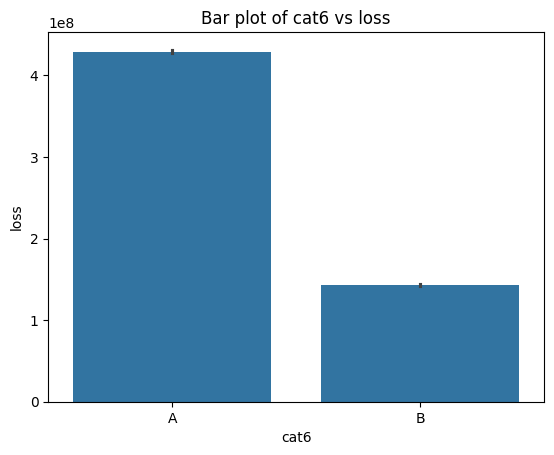

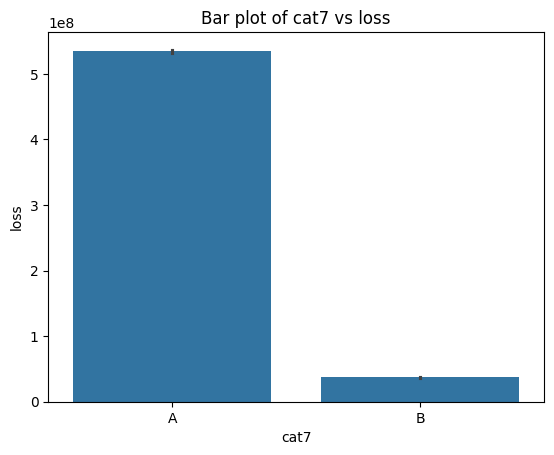

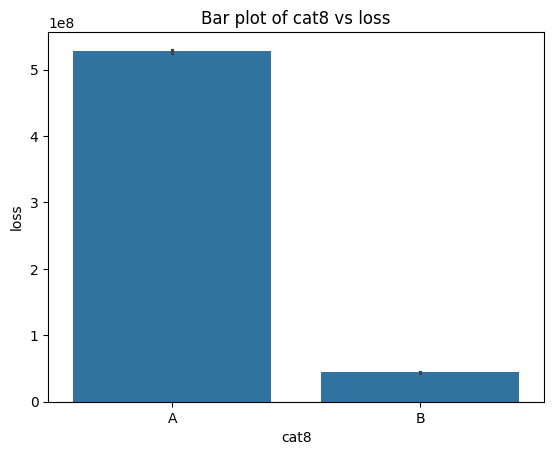

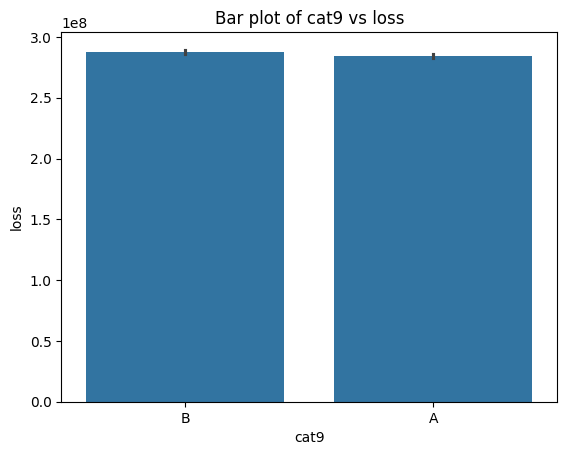

In [9]:
label_column
cat_feats= ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
for feature in cat_feats:
    sns.barplot(x=feature, y=label_column, data=df, estimator=sum)  
    plt.title(f'Bar plot of {feature} vs {label_column}')
    plt.xlabel(feature)
    plt.ylabel(label_column)
    plt.show()

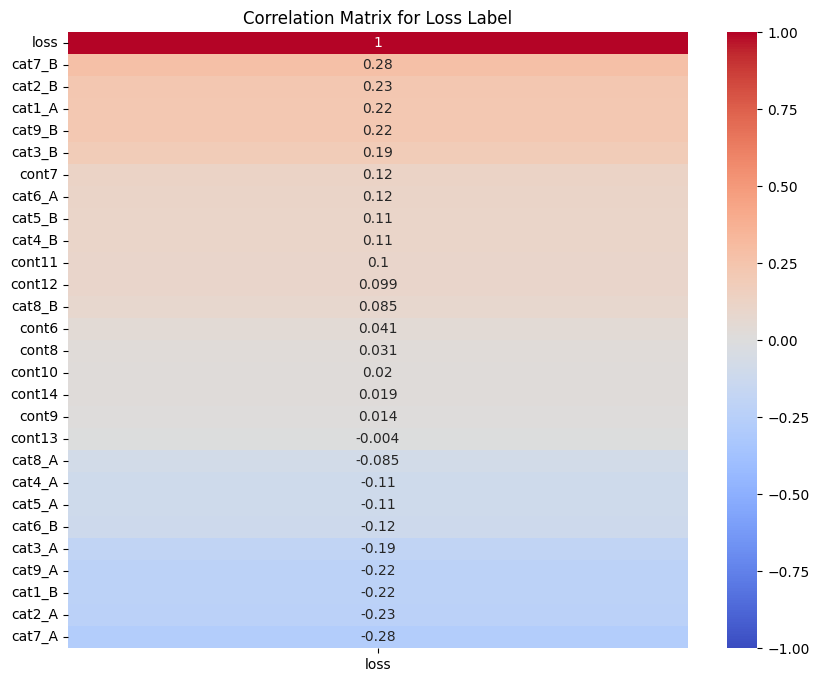

In [15]:
feats = cont_feats + cat_feats

df_encoded = pd.get_dummies(df[cat_feats])  
df_numeric = df[cont_feats] 
df_combined = pd.concat([df_numeric, df_encoded], axis=1) 

df_combined[label_column] = df[label_column]

correlation_matrix = df_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[[label_column]].sort_values(by=label_column, ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Loss Label')
plt.show()